In [17]:
import numpy as np
import matplotlib.pyplot as plt

# parameters
fs = 400.0          # sampling frequency [Hz]
N  = 2000           # number of samples
A  = 3.0            # |x[k]|_max
n_fft = 16384       # FFT size for smooth spectra

# frequencies
f1 = 300.0
f2 = 300.25
f3 = 299.75

In [18]:
# signal generation
k = np.arange(N)

x1 = A * np.sin(2 * np.pi * f1 * k / fs)
x2 = A * np.sin(2 * np.pi * f2 * k / fs)
x3 = A * np.sin(2 * np.pi * f3 * k / fs)

signals = {
    "f1 = 300 Hz":     x1,
    "f2 = 300.25 Hz":  x2,
    "f3 = 299.75 Hz":  x3,
}

In [19]:
# windowing
def flattop_window(N):
    """5-term Flat-top window (Harris coefficients)"""
    n = np.arange(N)
    a0, a1, a2, a3, a4 = 1.0, 1.93, 1.29, 0.388, 0.028
    return (
        a0
        - a1 * np.cos(2 * np.pi * n / (N - 1))
        + a2 * np.cos(4 * np.pi * n / (N - 1))
        - a3 * np.cos(6 * np.pi * n / (N - 1))
        + a4 * np.cos(8 * np.pi * n / (N - 1))
    )

windows = {
    "Rectangular": np.ones(N),
    "Hann":        np.hanning(N),
    "Flattop":     flattop_window(N),
}

In [20]:
# frequency axes and helper function
freq = np.linspace(0, fs, n_fft, endpoint=False)
half = n_fft // 2
freq_half = freq[:half]

# magnitude to dB
def mag2db(x, min_db=-120):
    mag = np.abs(x)
    mag = np.maximum(mag, 1e-12)
    db = 20 * np.log10(mag)
    return np.maximum(db, min_db)

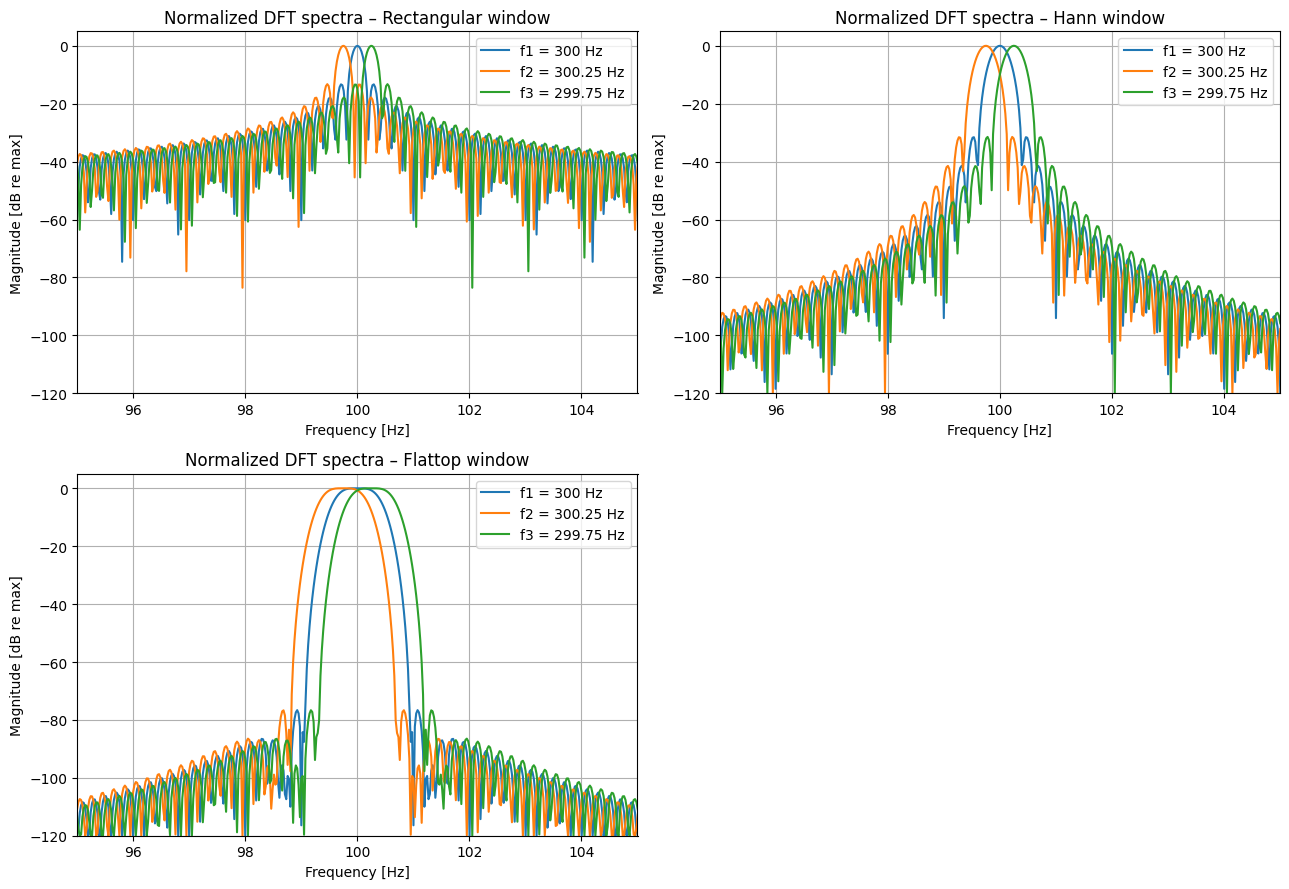

In [21]:
# normalizaed DFT spectra
plt.figure(figsize=(13, 9))

for i, (wname, w) in enumerate(windows.items(), start=1):
    plt.subplot(2, 2, i)

    for sname, x in signals.items():
        xw = x * w
        X = np.fft.fft(xw, n=n_fft)[:half]

        X_norm = X / np.max(np.abs(X))
        X_db = mag2db(X_norm)

        plt.plot(freq_half, X_db, label=sname)

    plt.title(f"Normalized DFT spectra – {wname} window")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude [dB re max]")

    plt.xlim([95, 105])
    plt.ylim([-120, 5])

    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

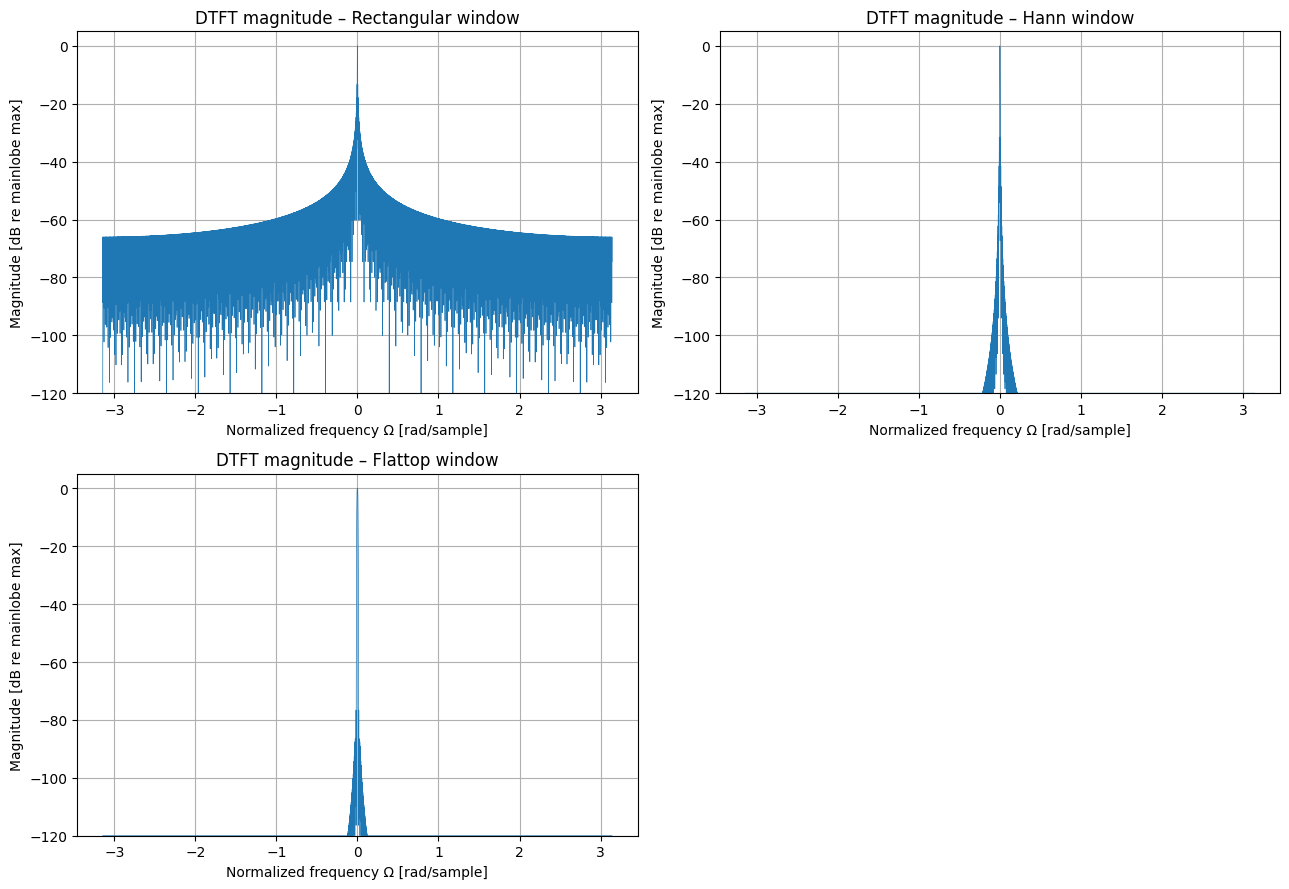

In [22]:
# window DTFT spectra
plt.figure(figsize=(13, 9))

omega = np.linspace(-np.pi, np.pi, n_fft, endpoint=False)

for i, (wname, w) in enumerate(windows.items(), start=1):
    W = np.fft.fft(w, n=n_fft)
    W = np.fft.fftshift(W)

    # normalize to mainlobe maximum
    W_norm = W / np.max(np.abs(W))
    W_db = mag2db(W_norm)

    plt.subplot(2, 2, i)
    plt.plot(omega, W_db, linewidth=0.5)
    plt.title(f"DTFT magnitude – {wname} window")
    plt.xlabel("Normalized frequency Ω [rad/sample]")
    plt.ylabel("Magnitude [dB re mainlobe max]")
    plt.ylim([-120, 5])
    plt.grid(True)

plt.tight_layout()
plt.show()